In [10]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [19]:
measurements_GPS = pd.read_csv("RawGyro.csv")
measurements_accel = pd.read_csv("RawAccel.csv")

In [20]:
measurements_GPS.head()

,Timpstemp,Error_count,x,y,z,temperature,range_rad_s,scaling,x_raw,y_raw,z_raw,temperature_raw,
0,7089907,0,-0.259554,0.567248,0.153042,9.642660,34.906586,0.001064,-189,522,129,-9154,
1,7190913,0,0.090053,-0.297565,-0.252444,9.648201,34.906586,0.001064,68,-324,-237,-9152,
2,7289907,0,0.048989,-0.344591,-0.001826,9.648201,34.906586,0.001064,40,-339,20,-9152,
3,7390907,0,-0.096871,-0.037510,0.204749,9.656511,34.906586,0.001064,-75,-19,186,-9149,
4,7489907,0,-0.197409,0.219465,-0.098364,9.639891,34.906586,0.001064,-159,252,-110,-9155,


In [21]:
measurements_accel.head()

,Timpstemp,Error_count,x,y,z,temperature,range_rad_s,scaling,x_raw,y_raw,z_raw,temperature_raw,
0,7090906,0,0.244930,0.193673,-10.587221,9.648201,156.906403,0.004788,-20,-80,-2195,-9152,
1,7190913,0,0.191809,-0.487059,-9.608912,9.648201,156.906403,0.004788,107,-31,-1980,-9152,
2,7290907,0,0.004109,-0.240623,-8.075992,9.645430,156.906403,0.004788,-142,-86,-1600,-9153,
3,7391908,0,-0.854582,-0.515484,-8.208664,9.648201,156.906403,0.004788,-139,-146,-1726,-9152,
4,7490907,0,-0.537616,0.054402,-9.014673,9.637119,156.906403,0.004788,-40,-10,-1969,-9156,


In [22]:
measurements = measurements_GPS.iloc[:, 2]
motion = measurements_accel.iloc[:, 2]
time_gps = measurements_GPS.iloc[:, 0]
time_accel = measurements_accel.iloc[:, 0]


In [23]:
time_accel.head()

0    7090906
1    7190913
2    7290907
3    7391908
4    7490907
Name: Timpstemp, dtype: int64

In [24]:
#splits = 3
#measurements_mean = [sum(measurements[i:i + splits])/splits 
 #                    for i in range(0,len(measurements),splits)]
    
        
   
        

In [25]:
print(len(measurements))
print(len(motion))

27050
27050


In [32]:
def update(mean1, var1, mean2, var2):
    new_mean = float(var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1./(1./var1 + 1./var2)
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]
save=[]

measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10.

for n in range(len(motion)) :
    [mu, sig]= update(mu, sig, measurements[n], measurement_sig)
    print ("update:", [mu, sig])
    save.append(mu)
    [mu , sig]= predict(mu, sig, motion[n], motion_sig)
    print ("pridict:", [mu, sig])
    
#print([mu, sig])

update: [-0.18539537276540483, 2.857142857142857]
pridict: [0.059534611446516866, 4.857142857142858]
update: [0.07627053847236019, 2.193548387096774]
pridict: [0.2680793880454955, 4.193548387096774]
update: [0.15594633580662134, 2.047244094488189]
pridict: [0.1600551521918905, 4.047244094488189]
update: [0.030837985400817638, 2.01174168297456]
pridict: [-0.8237443243220828, 4.011741682974559]
update: [-0.510117780429943, 2.0029311187103076]
pridict: [-1.0477340929337577, 4.002931118710308]
update: [-0.4997255307324472, 2.0007325112928824]
pridict: [-0.48614378261196045, 4.000732511292883]
update: [-0.19157379892994564, 2.000183111056856]
pridict: [-0.17100981277753513, 4.000183111056856]
update: [-0.10143456448951077, 2.000045776716436]
pridict: [-0.3497613130990536, 4.000045776716436]
update: [-0.14760216054014041, 2.0000114441136247]
pridict: [-0.43216081437162235, 4.000011444113625]
update: [-0.22289613924186782, 2.0000028610243135]
pridict: [-0.41071114978950574, 4.0000028610243135

In [33]:
print(save)

[-0.18539537276540483, 0.07627053847236019, 0.15594633580662134, 0.030837985400817638, -0.510117780429943, -0.4997255307324472, -0.19157379892994564, -0.10143456448951077, -0.14760216054014041, -0.22289613924186782, -0.22798356543172607, -0.2562843080036151, -0.10353376943868829, -0.1295882261692506, -0.17400422788477138, -0.16686652272583843, -0.013187401214705179, -0.019509661119397205, -0.06838758807381802, -0.03359445443240493, -0.12666069193671475, -0.26717797405514737, -0.2020982267309839, -0.36612058738120307, -0.4398800401476412, -0.1697631462706818, -0.12723936062523195, -0.08971866553757821, -0.0846438317471953, -0.18836164418169418, -0.12460166560266694, -0.13821140848921876, -0.3270133146312194, -0.1627753176374414, -0.18816581483101735, -0.0695309169735307, -0.21152404212185713, -0.08217579094123827, -0.02611266060447686, -0.17231664426016804, -0.202067004476428, -0.30857322083634137, -0.7802489907380045, -1.019320513349578, -0.6632547989695297, -0.8007999219104163, -0.718

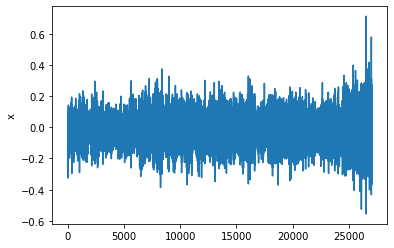

In [29]:
plt.plot(measurements)
plt.ylabel('x')
plt.show()

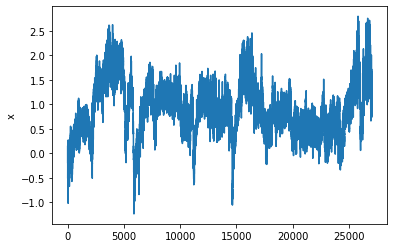

In [36]:
plt.plot(save)
plt.ylabel('x')
plt.show()